In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

In [3]:
# загрузка датафрейма
df = pd.read_csv('final_df.csv')

In [233]:
# описание данных
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1455 non-null   int64  
 1   title              1455 non-null   object 
 2   average_rating     1455 non-null   float64
 3   director           1455 non-null   object 
 4   writer             1455 non-null   object 
 5   metascore          1455 non-null   int64  
 6   cast               1455 non-null   object 
 7   country_of_origin  1455 non-null   object 
 8   languages          1455 non-null   object 
 9   runtime            1455 non-null   int64  
 10  genre              1455 non-null   object 
 11  budget             1455 non-null   int64  
 12  worldwide_gross    1455 non-null   int64  
 13  release_year       1455 non-null   int64  
 14  profit_or_loss     1455 non-null   int64  
 15  p&l_rate           1455 non-null   float64
dtypes: float64(2), int64(7),

,Unnamed: 0,title,average_rating,director,writer,metascore,cast,country_of_origin,languages,runtime,genre,budget,worldwide_gross,release_year,profit_or_loss,p&l_rate
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",United States,English,142,Drama,25000000,29332133,1994,4332133,17.33
1,1,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",United States,"English, Italian, Latin",175,"Crime, Drama",6000000,250342198,1978,244342198,4072.37
2,4,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","United States, United Kingdom","English, Mandarin",152,"Action, Crime, Drama",185000000,1009053678,2008,824053678,445.43
3,5,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",United States,"English, Hebrew, German, Polish, Latin",195,"Biography, Drama, History",22000000,322161245,1993,300161245,1364.37
4,6,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",United States,English,96,"Crime, Drama",350000,2945,1957,-347055,-99.16


In [234]:
# удаление лишнего столбца
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
# типы данных:
'''
Категориальные номинальные:
- title;
- director;
- writer;
- cast;
- country_of_origin;
- languages;
- genre;

Числовые дискретные:
- runtime;
- budget;
- worldwide_gross;
- release_year;  
- profit_or_loss;

Числовые непрерывные:
- average_rating;
- metascore;
- p&l_rate;
 '''

In [235]:
# пропуски данных
value_miss = df.isna().sum()
value_miss

title                0
average_rating       0
director             0
writer               0
metascore            0
cast                 0
country_of_origin    0
languages            0
runtime              0
genre                0
budget               0
worldwide_gross      0
release_year         0
profit_or_loss       0
p&l_rate             0
dtype: int64

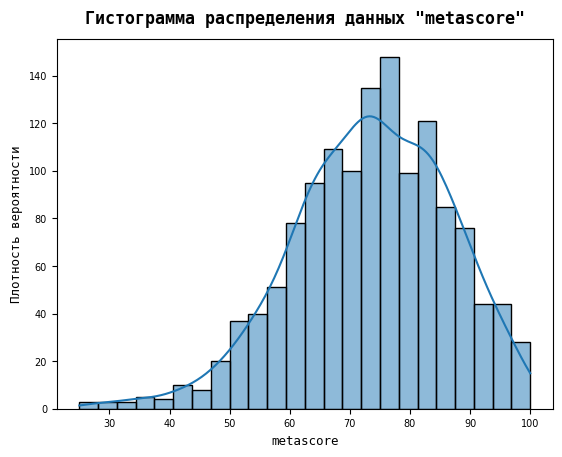

In [236]:
'''
Пропуски в данных отсутсвуют, т.к. датасет был предобработан на предыдущем шаге посредством: 
1. приведения данных к одному формату и удаления дубликатов;
2. удаления пустых значений по полям "cast", "language";
3. ручного заполнения пустых значений в поле "runtime" в связи с небольшим кол-вом пропущенных значений(9) с целью сохранения максимально возможного объема данных;
4. заполнения пустых значений в поле "Оценка критиков" медианой c группировкой по жанрам: она устойчивее к выбросам и лучше отражает центральную тенденцию в случае данного ассиметричного распределения с хвостом слева;
'''
df_meta = pd.read_csv('non_missing_metascore.csv')
df_meta = df_meta['metascore']
sns.histplot(df_meta, kde=True)
plt.title('Гистограмма распределения данных "metascore"', fontsize=12, fontweight="bold", family='monospace', y = 1.02)
plt.xlabel("metascore", fontsize=9, family='monospace')
plt.ylabel("Плотность вероятности", fontsize=9, family='monospace')
plt.tick_params(labelsize=7)
plt.show()


In [237]:
# описательные статистики; диапазоны значений для числовых признаков
df.describe()

,average_rating,metascore,runtime,budget,worldwide_gross,release_year,profit_or_loss,p&l_rate
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1455.000000,1.455000e+03,1455.000000
mean,7.609759,73.377320,121.134021,3.078353e+07,1.275457e+08,1997.533333,9.676220e+07,474.996893
std,0.357549,12.526666,24.259159,4.636157e+07,2.474767e+08,21.534434,2.125636e+08,1606.678629
min,7.200000,25.000000,2.000000,2.500000e+03,1.900000e+01,1920.000000,-1.580311e+08,-100.000000
25%,7.300000,66.000000,105.000000,3.600000e+06,5.651243e+06,1986.500000,-5.185755e+05,-22.655000
50%,7.500000,73.000000,119.000000,1.400000e+07,3.469875e+07,2004.000000,1.893600e+07,150.300000
75%,7.800000,82.000000,134.000000,3.500000e+07,1.268048e+08,2014.000000,9.339614e+07,446.715000
max,9.300000,100.000000,271.000000,3.551000e+08,2.923706e+09,2024.000000,2.686706e+09,31662.700000


In [238]:
median = df.median(numeric_only=True)
median

average_rating            7.5
metascore                73.0
runtime                 119.0
budget             14000000.0
worldwide_gross    34698753.0
release_year           2004.0
profit_or_loss     18936003.0
p&l_rate                150.3
dtype: float64

In [239]:
# уникальные значения категориальных переменных
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} уникальных значений")

title: 1449 уникальных значений
director: 716 уникальных значений
writer: 1321 уникальных значений
cast: 1455 уникальных значений
country_of_origin: 290 уникальных значений
languages: 390 уникальных значений
genre: 249 уникальных значений


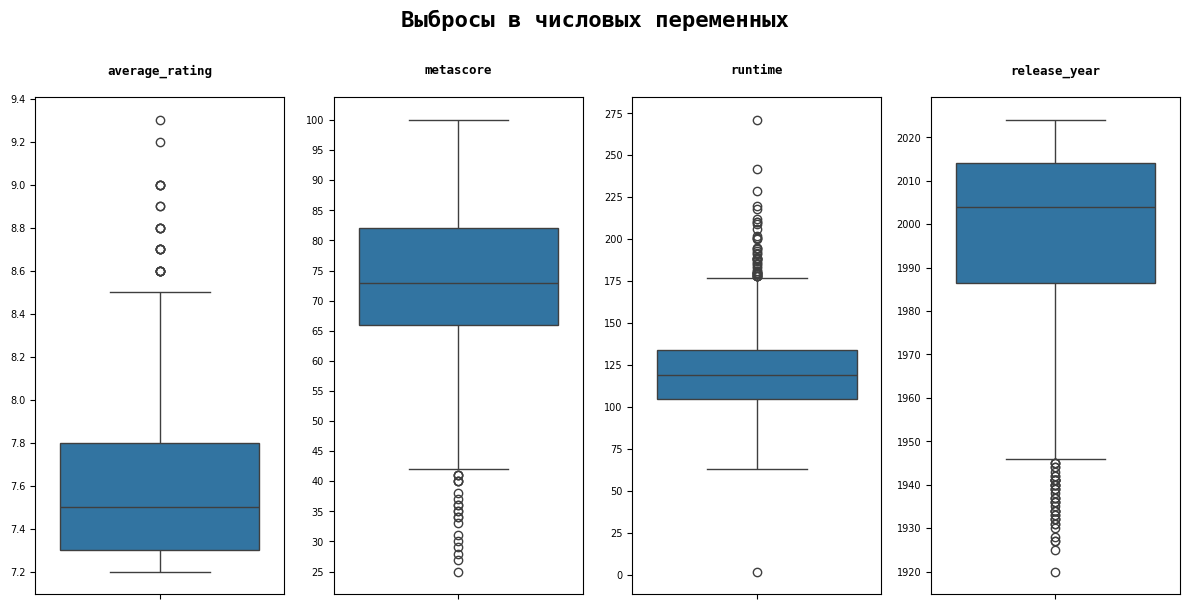

In [240]:
# выбросы
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

sns.boxplot(y=df['average_rating'], ax=axes[0])
axes[0].set_title('average_rating', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0].set_ylabel(None)
axes[0].tick_params(labelsize=7)
axes[0].yaxis.set_major_locator(MultipleLocator(0.2))

sns.boxplot(y=df['metascore'], ax=axes[1])
axes[1].set_title('metascore', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1].set_ylabel(None)
axes[1].tick_params(labelsize=7)
axes[1].yaxis.set_major_locator(MultipleLocator(5))

sns.boxplot(y=df['runtime'], ax=axes[2])
axes[2].set_title('runtime', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[2].set_ylabel(None)
axes[2].tick_params(labelsize=7)
axes[2].yaxis.set_major_locator(MultipleLocator(25))

sns.boxplot(y=df['release_year'], ax=axes[3])
axes[3].set_title('release_year', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[3].set_ylabel(None)
axes[3].tick_params(labelsize=7)
axes[3].yaxis.set_major_locator(MultipleLocator(10))

fig.suptitle("Выбросы в числовых переменных", fontsize=16, fontweight="bold", family='monospace', y = 1.007)
plt.tight_layout()
plt.show()

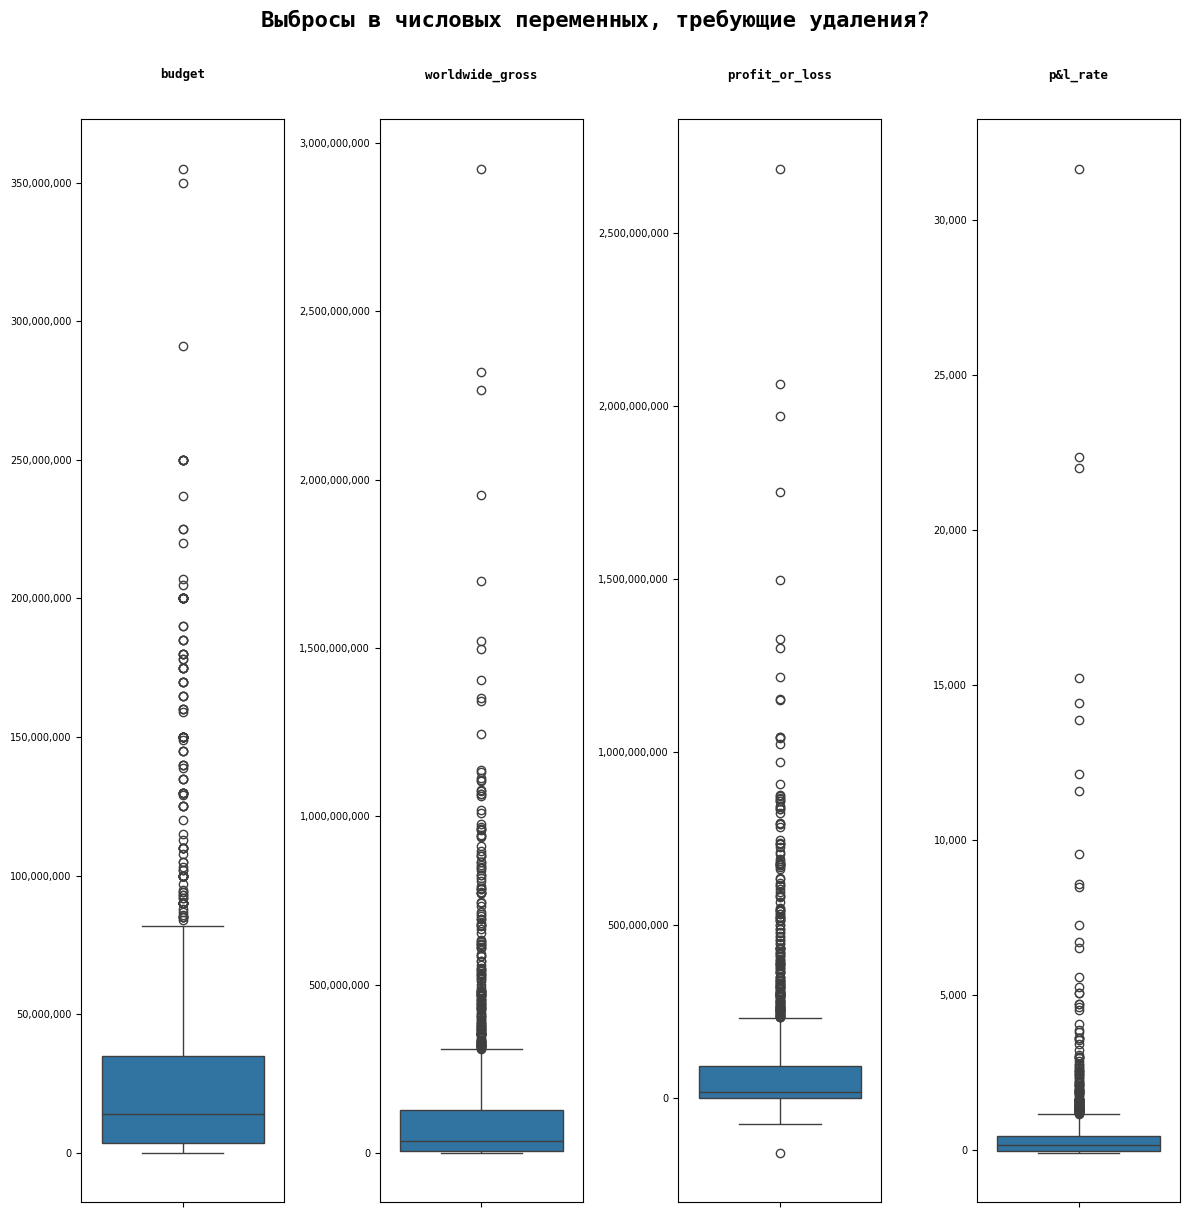

In [241]:
fig, axes = plt.subplots(1, 4, figsize=(12, 12))

sns.boxplot(y=df['budget'], ax=axes[0])
axes[0].set_title('budget', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0].set_ylabel(None)
axes[0].tick_params(labelsize=7)

sns.boxplot(y=df['worldwide_gross'], ax=axes[1])
axes[1].set_title('worldwide_gross', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1].set_ylabel(None)
axes[1].tick_params(labelsize=7)

sns.boxplot(y=df['profit_or_loss'], ax=axes[2])
axes[2].set_title('profit_or_loss', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[2].set_ylabel(None)
axes[2].tick_params(labelsize=7)

sns.boxplot(y=df['p&l_rate'], ax=axes[3])
axes[3].set_title('p&l_rate', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[3].set_ylabel(None)
axes[3].tick_params(labelsize=7)

# форматирование отображения значений оси без научной нотации
def format_func(value, tick_number):
    return f'{value:,.0f}'
for ax in axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

fig.suptitle("Выбросы в числовых переменных, требующие удаления?", fontsize=16, fontweight="bold", family='monospace', y = 1.01)
plt.tight_layout()
plt.show()

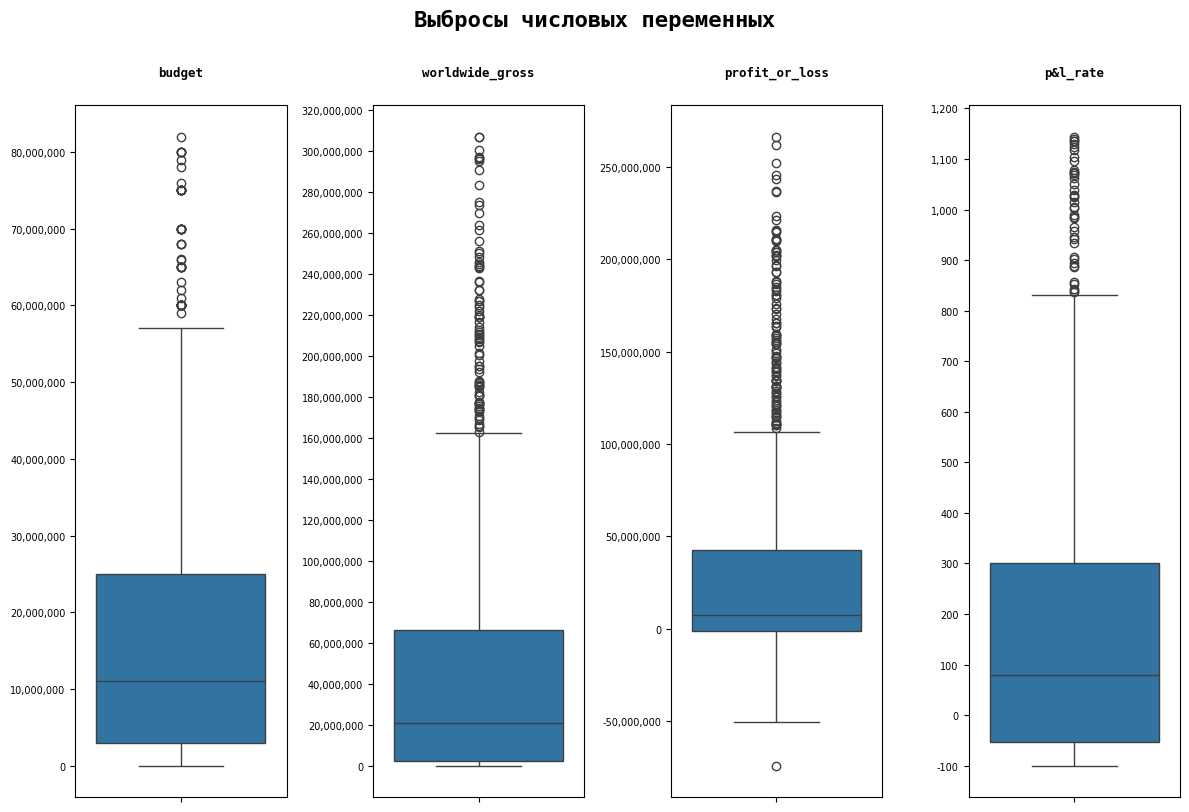

In [242]:
# удаление выбросов
df_remove_outliers = df.copy()
def remove_outliers(df_remove_outliers, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_remove_outliers[(df_remove_outliers[column] >= lower_bound) & (df_remove_outliers[column] <= upper_bound)]

for col in ['runtime', 'budget', 'worldwide_gross', 'p&l_rate']:
    df_remove_outliers = remove_outliers(df_remove_outliers, col)

fig, axes = plt.subplots(1, 4, figsize=(12, 8))

sns.boxplot(y=df_remove_outliers['budget'], ax=axes[0])
axes[0].set_title('budget', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0].set_ylabel(None)
axes[0].tick_params(labelsize=7)
axes[0].yaxis.set_major_locator(MultipleLocator(10000000))

sns.boxplot(y=df_remove_outliers['worldwide_gross'], ax=axes[1])
axes[1].set_title('worldwide_gross', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1].set_ylabel(None)
axes[1].tick_params(labelsize=7)
axes[1].yaxis.set_major_locator(MultipleLocator(20000000))

sns.boxplot(y=df_remove_outliers['profit_or_loss'], ax=axes[2])
axes[2].set_title('profit_or_loss', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[2].set_ylabel(None)
axes[2].tick_params(labelsize=7)

sns.boxplot(y=df_remove_outliers['p&l_rate'], ax=axes[3])
axes[3].set_title('p&l_rate', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[3].set_ylabel(None)
axes[3].tick_params(labelsize=7)
axes[3].yaxis.set_major_locator(MultipleLocator(100))

# форматирование отображения значений оси без научной нотации
def format_func(value, tick_number):
    return f'{value:,.0f}'
for ax in axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

fig.suptitle("Выбросы числовых переменных", fontsize=16, fontweight="bold", family='monospace', y = 1.01)
plt.tight_layout()
plt.show()

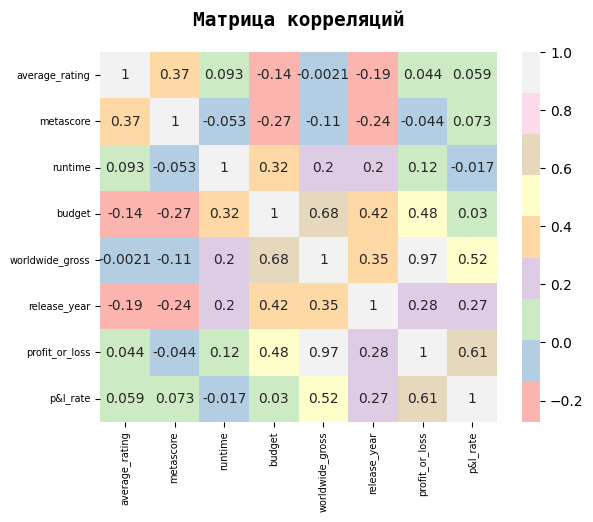

In [247]:
# матрица корреляций
sns.heatmap(df_remove_outliers.corr(numeric_only = True), cmap = 'Pastel1', annot=True);
plt.title("Матрица корреляций", fontsize=14, fontweight="bold", family='monospace', y = 1.05)
plt.tick_params(labelsize=7)
plt.show()

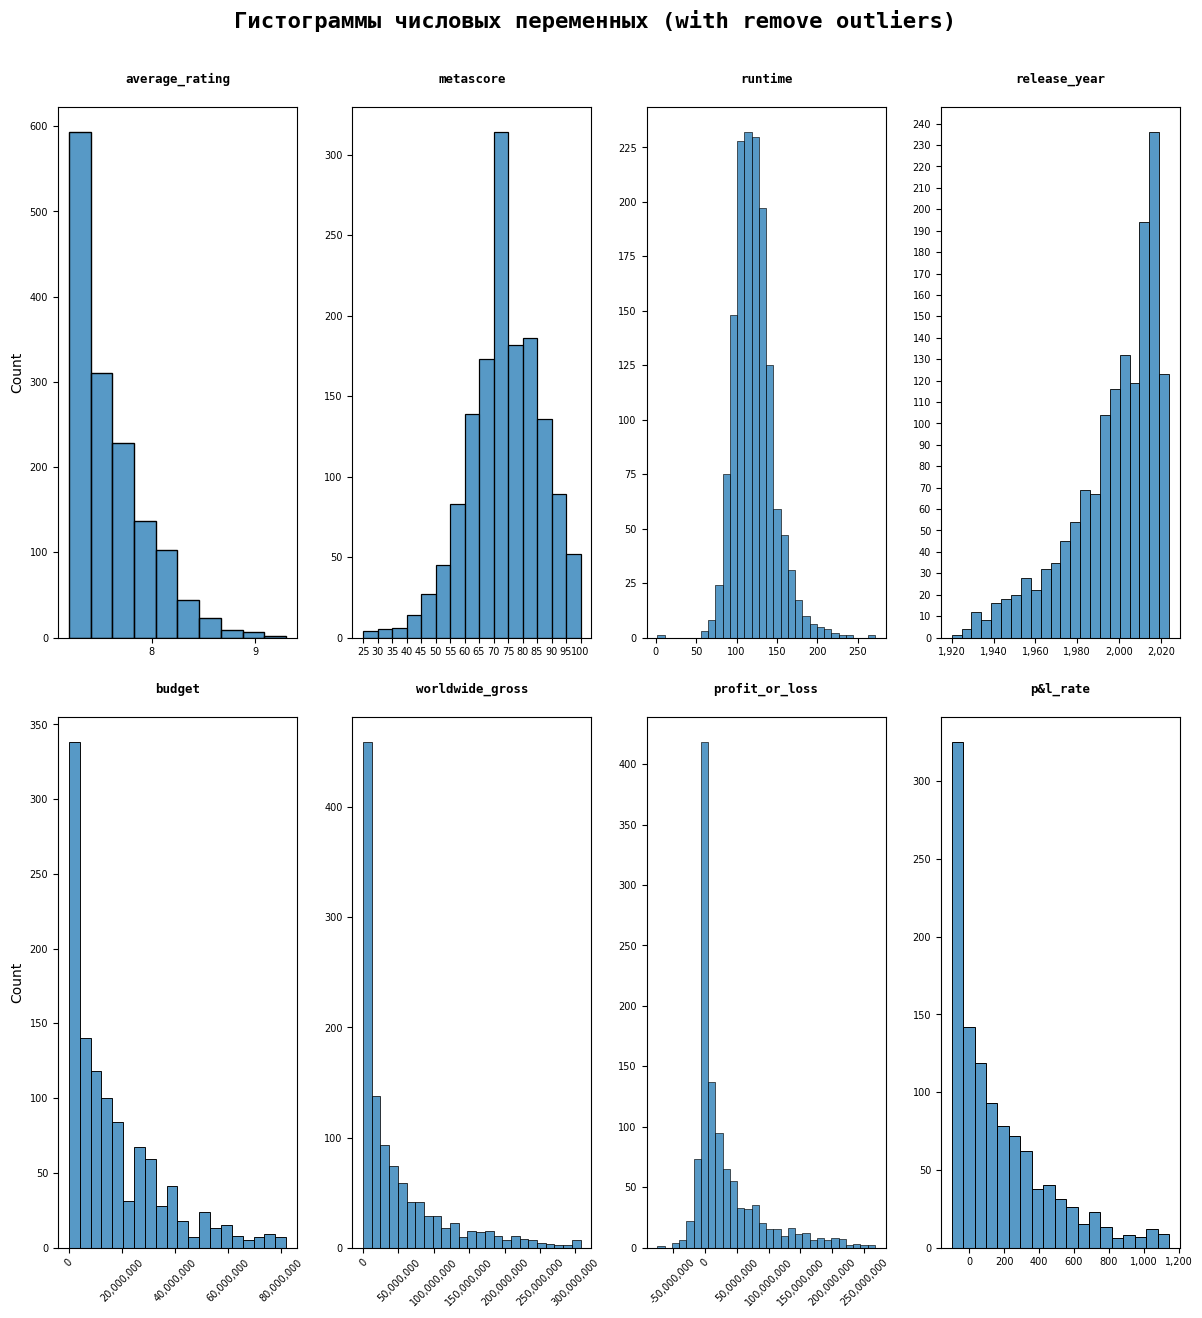

In [230]:
# визуализация данных: гистограммы числовых переменных
fig, axes = plt.subplots(2, 4, figsize=(12, 13))

sns.histplot(df['average_rating'], ax=axes[0, 0], bins=10)
axes[0, 0].set_title('average_rating', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0, 0].tick_params(labelsize=7)
axes[0, 0].set_xlabel(None)
axes[0, 0].xaxis.set_major_locator(MultipleLocator(1))

sns.histplot(df['metascore'], ax=axes[0, 1], bins=15)
axes[0, 1].set_title('metascore', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0, 1].tick_params(labelsize=7)
axes[0, 1].xaxis.set_major_locator(MultipleLocator(5))
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)

sns.histplot(df['runtime'], ax=axes[0, 2], bins=30)
axes[0, 2].set_title('runtime', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0, 2].tick_params(labelsize=7)
axes[0, 2].yaxis.set_major_locator(MultipleLocator(25))
axes[0, 2].set_xlabel(None)
axes[0, 2].set_ylabel(None)

sns.histplot(df['release_year'], ax=axes[0, 3])
axes[0, 3].set_title('release_year', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[0, 3].tick_params(labelsize=7)
axes[0, 3].yaxis.set_major_locator(MultipleLocator(10))
axes[0, 3].set_xlabel(None)
axes[0, 3].set_ylabel(None)

sns.histplot(df_remove_outliers['budget'], ax=axes[1, 0])
axes[1, 0].set_title('budget', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1, 0].tick_params(labelsize=7)
axes[1, 0].set_xlabel(None)
axes[1, 0].tick_params(axis='x', rotation=45)

sns.histplot(df_remove_outliers['worldwide_gross'], ax=axes[1, 1])
axes[1, 1].set_title('worldwide_gross', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1, 1].tick_params(labelsize=7)
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel(None)
axes[1, 1].tick_params(axis='x', rotation=45)

sns.histplot(df_remove_outliers['profit_or_loss'], ax=axes[1, 2], bins=30)
axes[1, 2].set_title('profit_or_loss', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1, 2].tick_params(labelsize=7)
axes[1, 2].set_xlabel(None)
axes[1, 2].set_ylabel(None)
axes[1, 2].tick_params(axis='x', rotation=45)

sns.histplot(df_remove_outliers['p&l_rate'], ax=axes[1, 3])
axes[1, 3].set_title('p&l_rate', y = 1.03, fontsize=9, fontweight="bold", family='monospace')
axes[1, 3].tick_params(labelsize=7)
axes[1, 3].set_xlabel(None)
axes[1, 3].set_ylabel(None)

# форматирование отображения значений оси без научной нотации
def format_func(value, tick_number):
    return f'{value:,.0f}'
for ax in axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))

fig.suptitle("Гистограммы числовых переменных (with remove outliers)", fontsize=16, fontweight="bold", family='monospace', y = 1.01)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
plt.show()

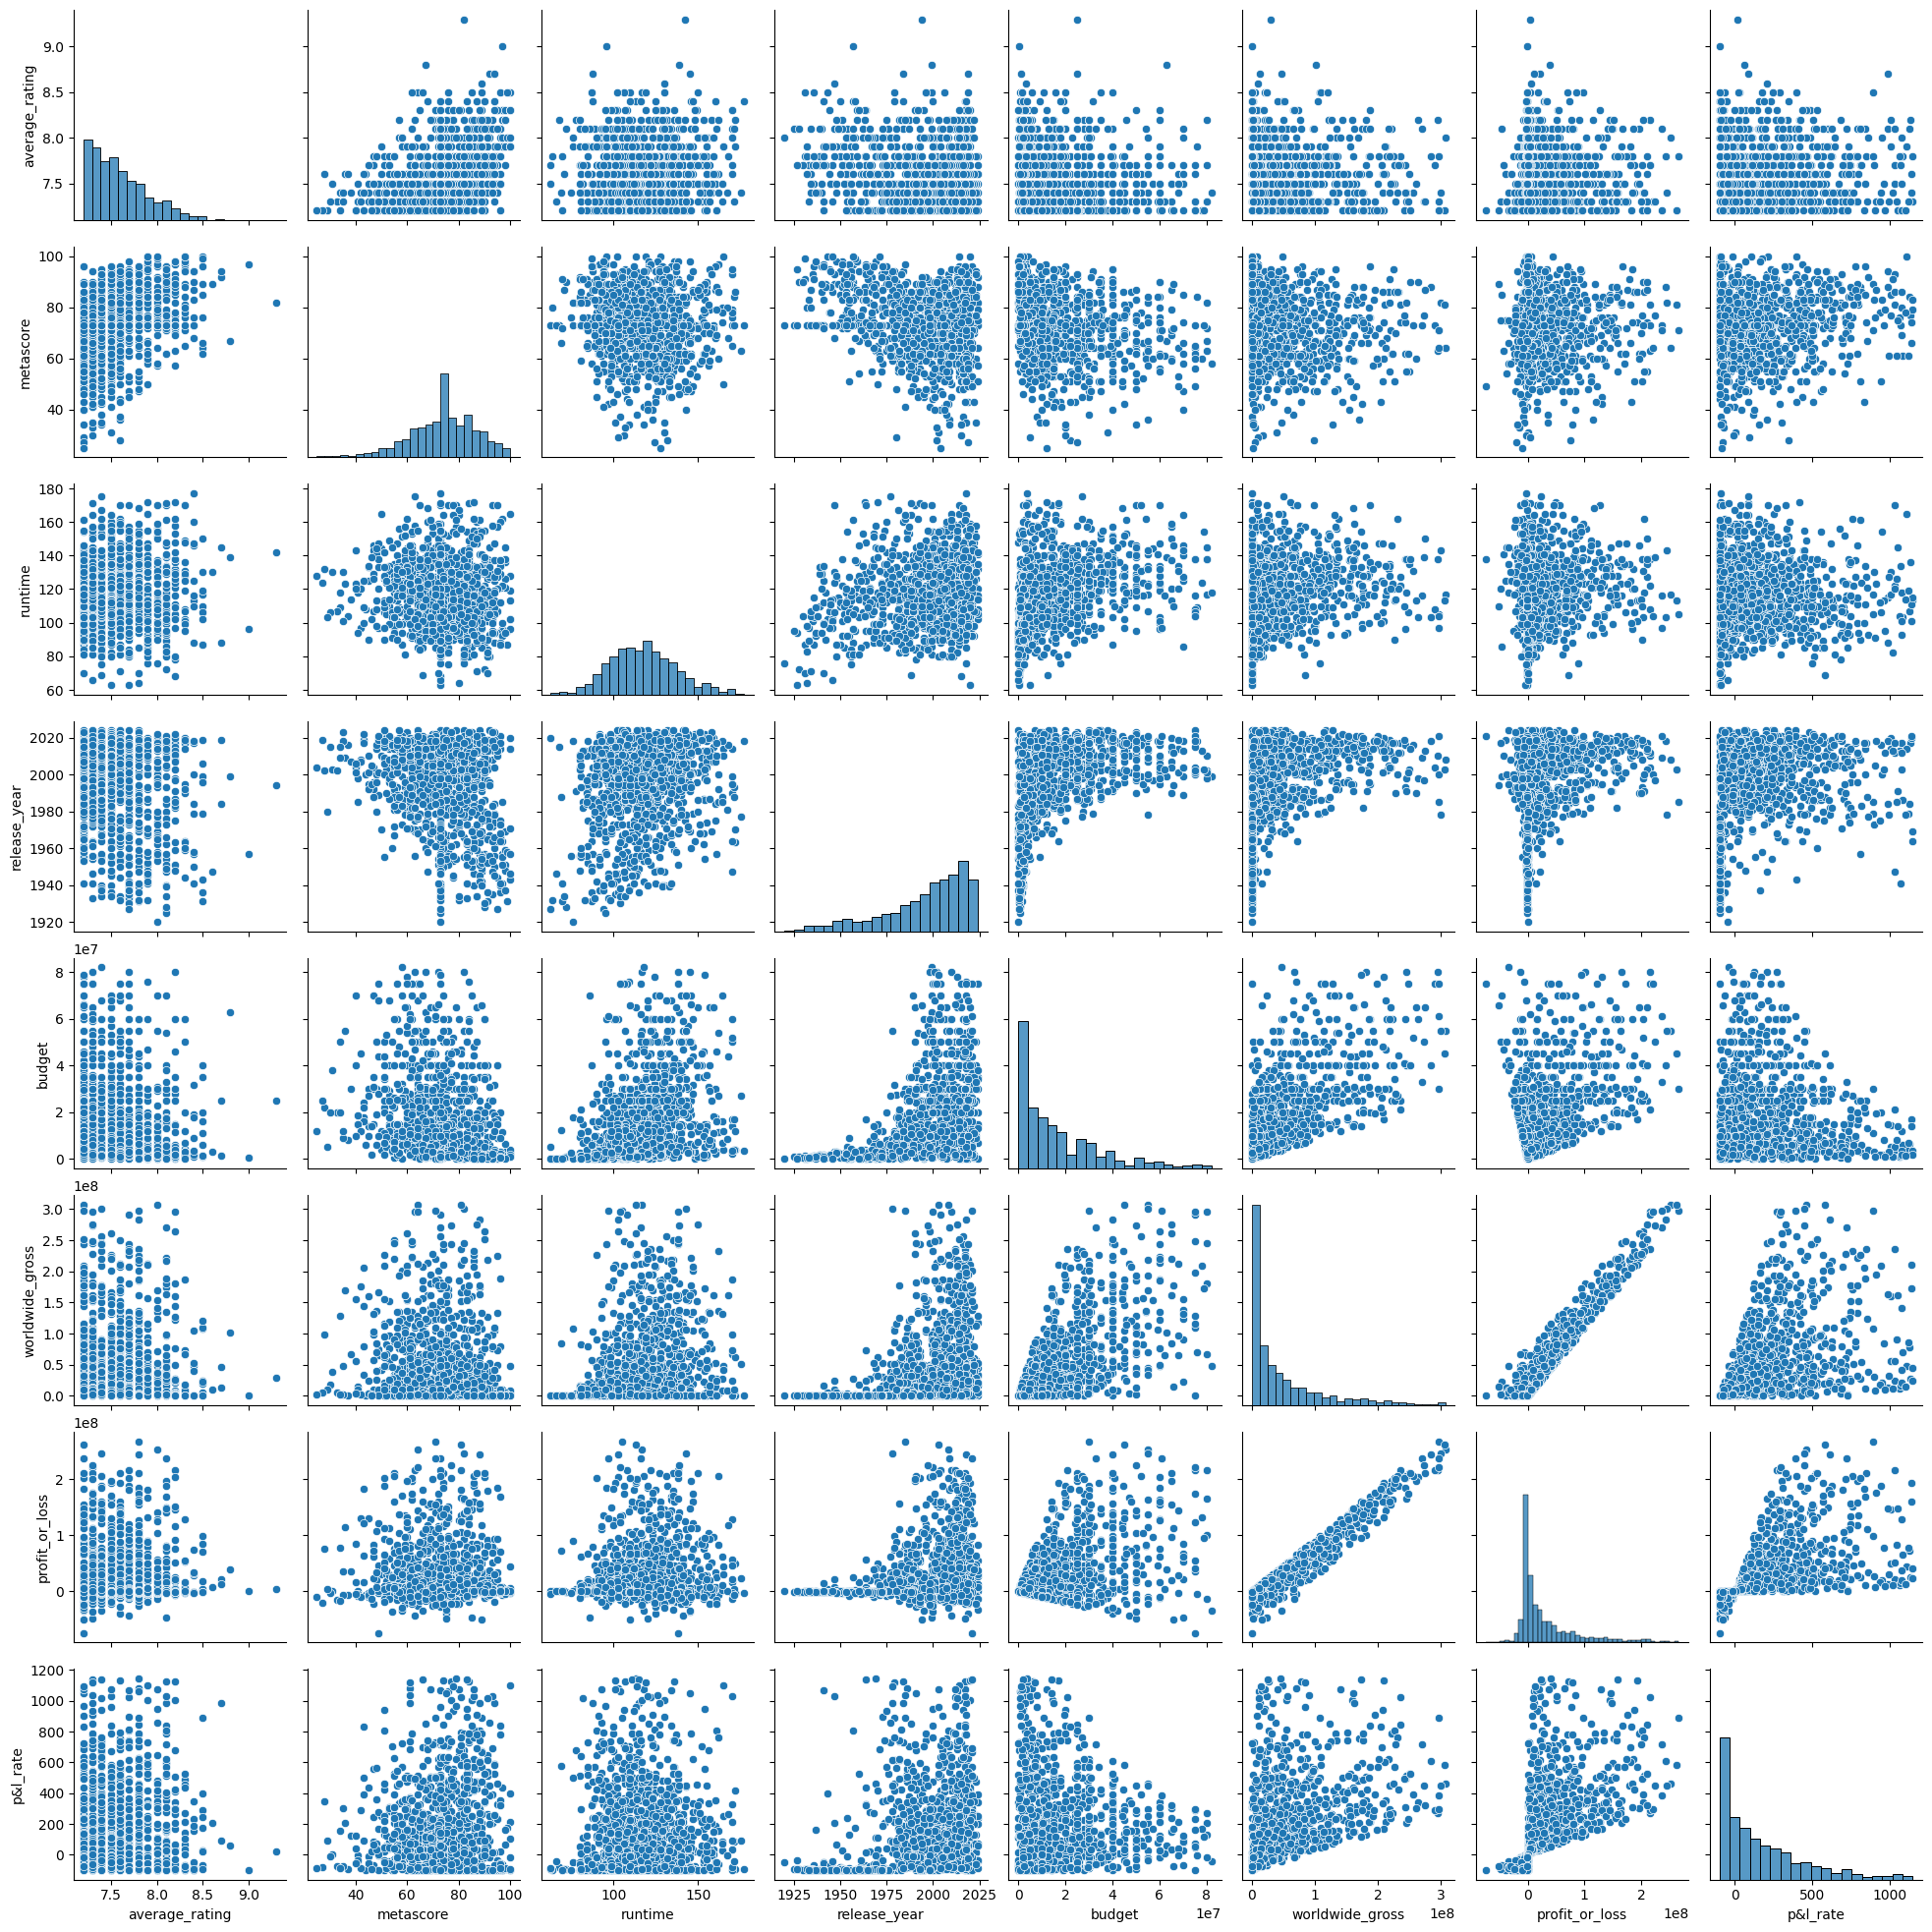

In [ ]:
# визуализации относительных распределений между парами переменных: pairplot

columns = ['average_rating', 'metascore', 'runtime', 'release_year', 'budget', 'worldwide_gross', 'profit_or_loss', 'p&l_rate']
sns.pairplot(df_remove_outliers[columns])

plt.show()


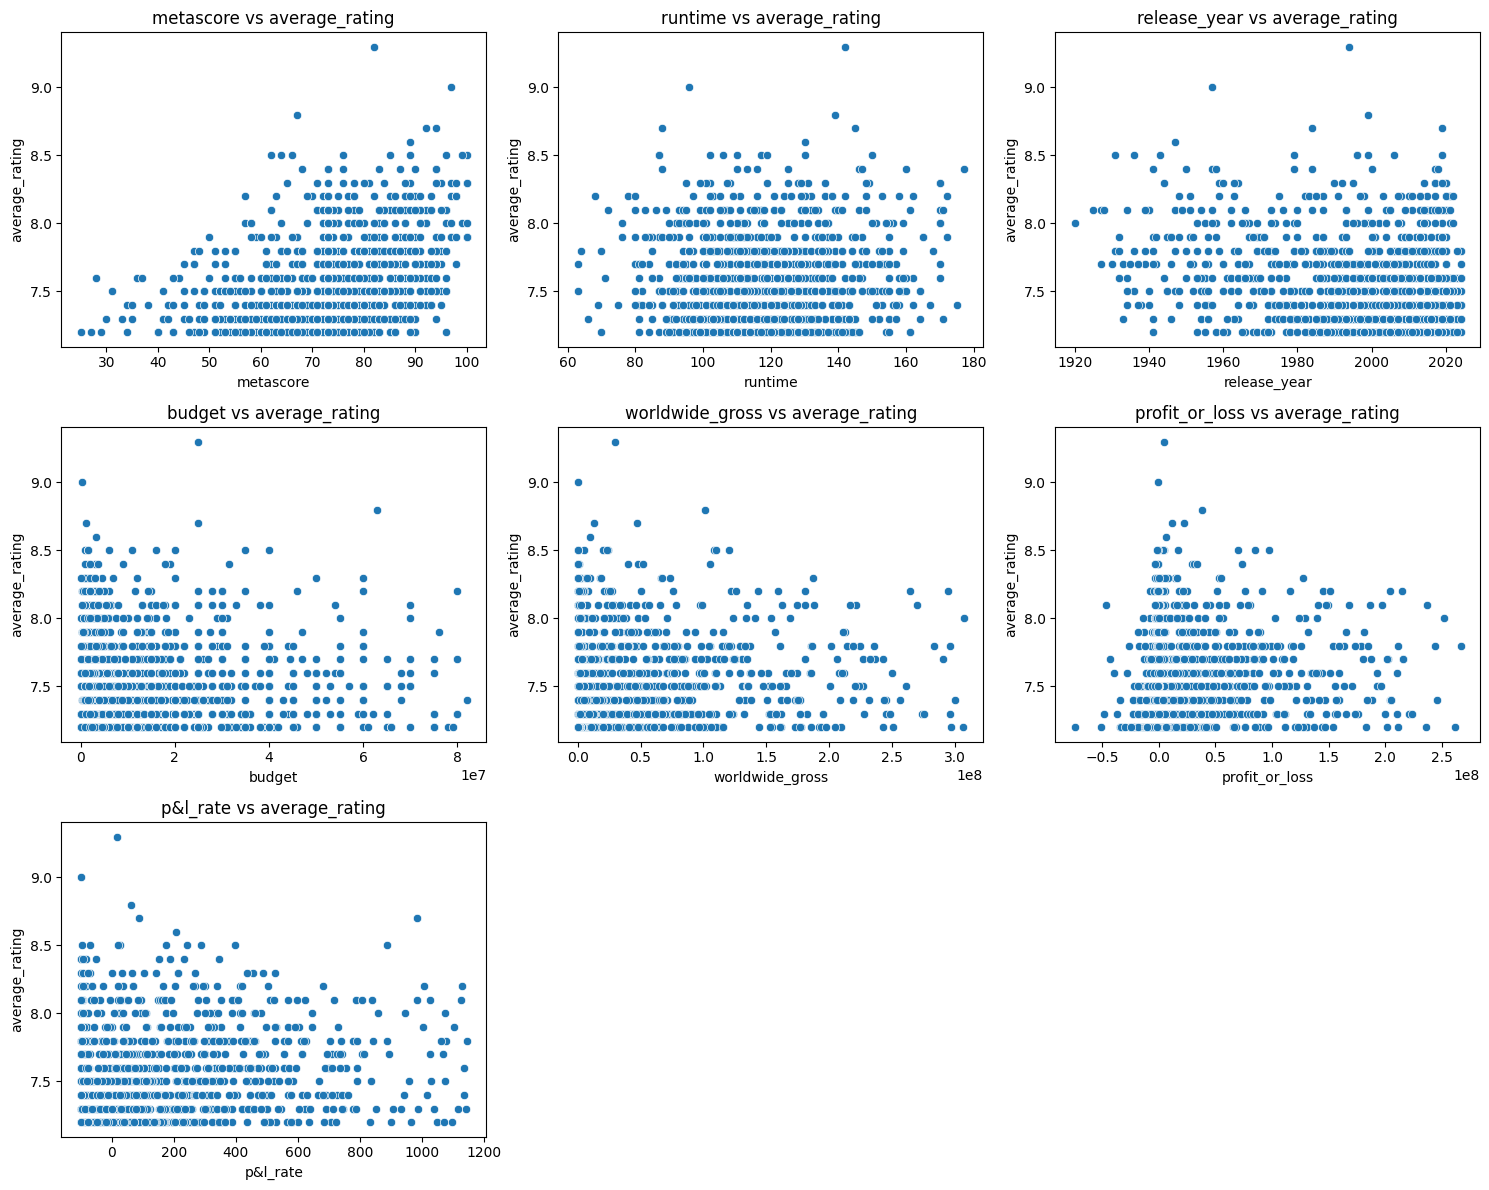

In [ ]:
# предположим, что целевая переменная - 'average_rating'
features = ['metascore', 'runtime', 'release_year', 'budget', 'worldwide_gross', 'profit_or_loss', 'p&l_rate']
target = 'average_rating'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flat

for col, ax in zip(features, axes):
    scatter = sns.scatterplot(data=df_remove_outliers, x=col, y=target, ax=ax)
    ax.set_title(f"{col} vs {target}")

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

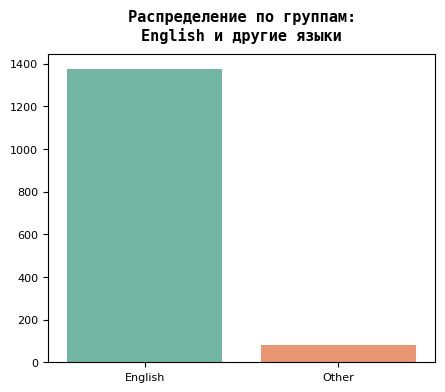

In [271]:
# столбчатые диаграммы категориальных переменных
'''разделение languages на две группы: 1. группа с языком English (присутсвует в строке "English");
                                       2. группа с другими языками (если в строке не указан "English")'''

df['group'] = df['languages'].apply(lambda x: 'English' if 'English' in x else 'Other')
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='group', hue='group', palette='Set2', legend=False)
plt.title('Распределение по группам:\nEnglish и другие языки', fontsize=11, fontweight="bold", family='monospace', y = 1.02)
plt.tick_params(labelsize=8)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [279]:
'''подсчет уникальных значений (языков) в столбце "languages"'''

unique_lang = set(', '.join(df['languages']).split(', '))
print(f"Количество уникальных языков: {len(unique_lang)}")


Количество уникальных языков: 122


Количество уникальных языков: 24


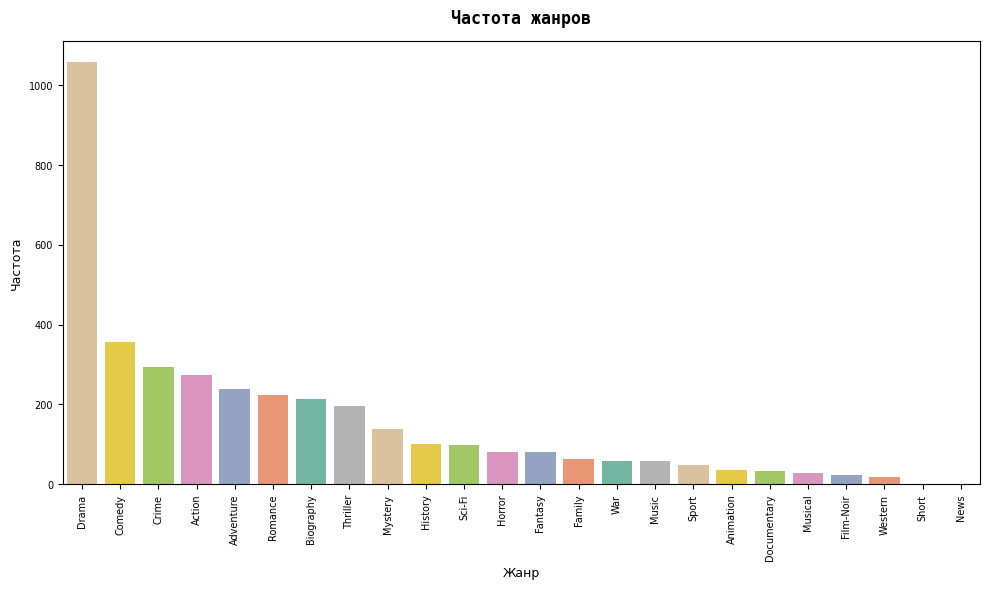

In [ ]:
'''подсчет уникальных значений (жанров) в столбце "genre"'''

unique_genre = set(', '.join(df['genre'].str.strip()).split(', '))
print(f"Количество уникальных жанров: {len(unique_genre)}")

# визуализация genre
unique_genre = ', '.join(df['genre'].str.strip()).split(', ')
genre_counts = pd.Series(unique_genre).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts, palette='Set2', legend=False)
plt.title('Частота жанров', fontsize=12, fontweight="bold", family='monospace', y = 1.02)
plt.xlabel('Жанр', fontsize=9)
plt.ylabel('Частота', fontsize=9)
plt.xticks(rotation=90)
plt.tick_params(labelsize=7)
plt.tight_layout()
plt.show()


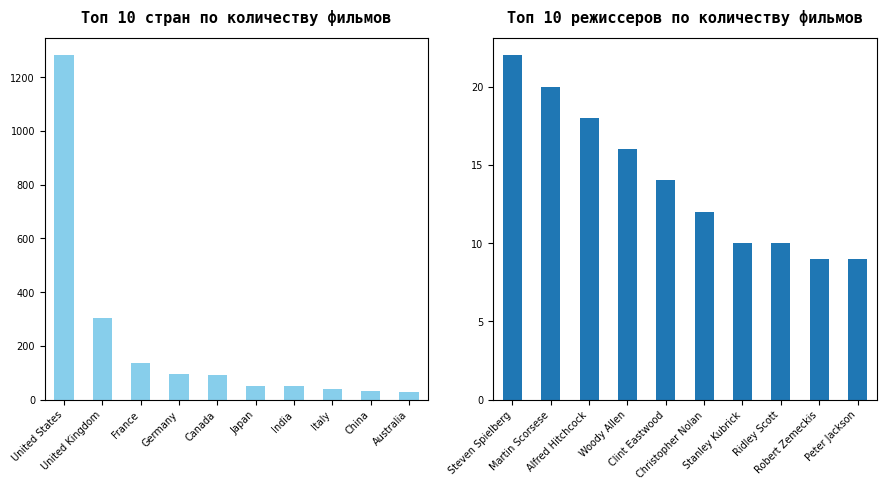

In [309]:
# топ 10
# топ 10 стран по количеству снятых фильмов
country = ', '.join(df['country_of_origin'].str.strip()).split(', ')
country_counts = pd.Series(country).value_counts()


fig, axes = plt.subplots(1, 2, figsize=(9, 5))

country_counts.head(10).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Топ 10 стран по количеству фильмов", fontsize=11, fontweight="bold", family='monospace', y=1.02)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].tick_params(labelsize=7)

# топ 10 режиссеров по количеству снятых фильмов
df['director'].value_counts().head(10).plot(kind='bar', ax=axes[1])
axes[1].set_title("Топ 10 режиссеров по количеству фильмов", fontsize=11, fontweight="bold", family='monospace', y=1.02)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].tick_params(labelsize=7)
axes[1].set_xlabel(None)

plt.tight_layout()
plt.show()


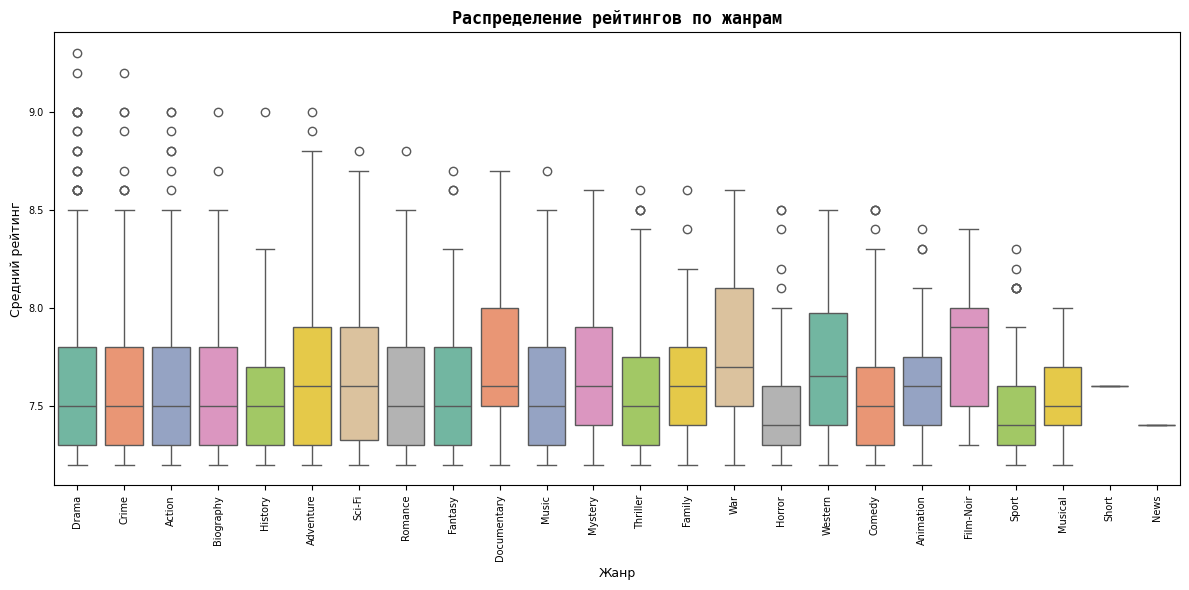

In [347]:
# boxplot для genre

df_exploded_g = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_exploded_g['genre'] = df_exploded_g['genre'].str.strip()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded_g, x="genre", hue="genre", y="average_rating", palette="Set2")

plt.xticks(rotation=90)
plt.title("Распределение рейтингов по жанрам", fontsize=12, fontweight="bold", family='monospace')
plt.xlabel("Жанр", fontsize=9)
plt.ylabel("Средний рейтинг", fontsize=9)
plt.tick_params(labelsize=7)
plt.tight_layout()
plt.show()

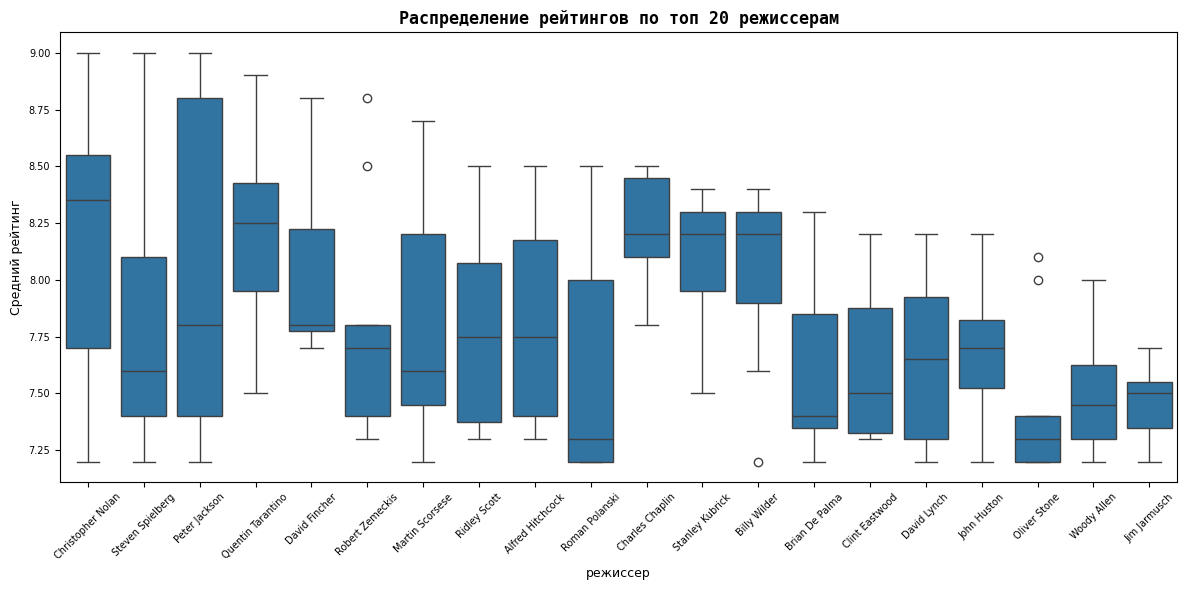

In [11]:
# boxplot для director (топ 10)

top_directors = df["director"].value_counts().index[:20]

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[df["director"].isin(top_directors)], x="director", y="average_rating")
plt.xticks(rotation=45)
plt.title("Распределение рейтингов по топ 20 режиссерам", fontsize=12, fontweight="bold", family='monospace')
plt.xlabel("режиссер", fontsize=9)
plt.ylabel("Средний рейтинг", fontsize=9)
plt.tick_params(labelsize=7)
plt.tight_layout()
plt.show()

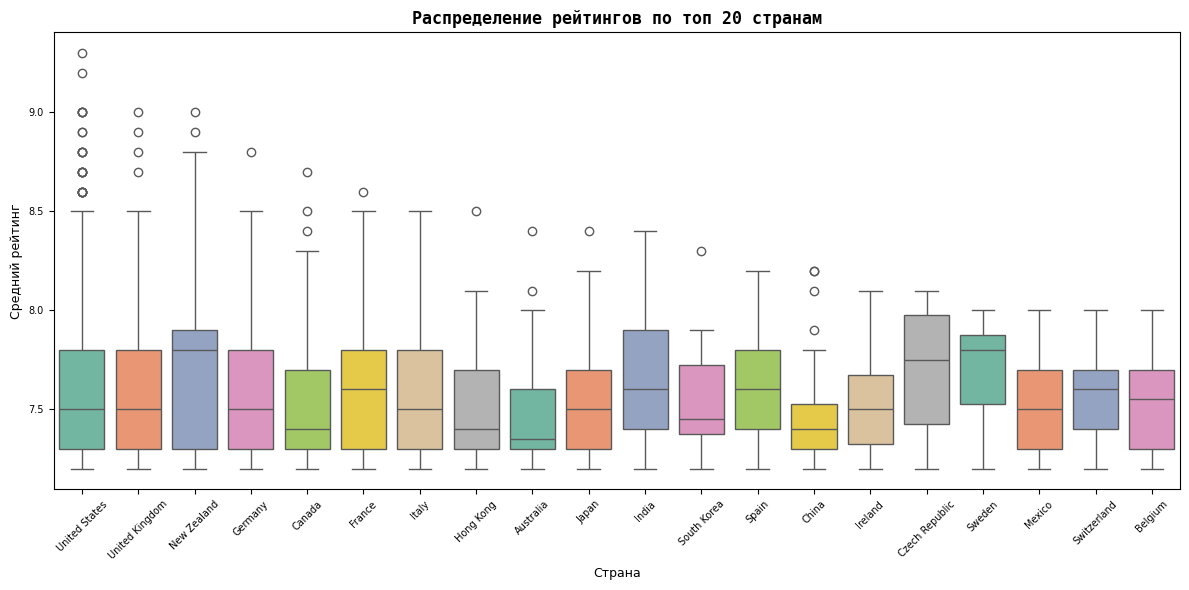

In [13]:
# boxplot для стран (топ 20)

df_exploded_c = df.assign(country_of_origin=df['country_of_origin'].str.split(', ')).explode('country_of_origin')
df_exploded_c['country_of_origin'] = df_exploded_c['country_of_origin'].str.strip()

top_countries = df_exploded_c['country_of_origin'].value_counts().head(20).index.tolist()
df_filtered = df_exploded_c[df_exploded_c['country_of_origin'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="country_of_origin", y="average_rating", hue="country_of_origin", palette="Set2")

plt.xticks(rotation=45)
plt.title("Распределение рейтингов по топ 20 странам", fontsize=12, fontweight="bold", family='monospace')
plt.xlabel("Страна", fontsize=9)
plt.ylabel("Средний рейтинг", fontsize=9)
plt.tick_params(labelsize=7)
plt.tight_layout()
plt.show()


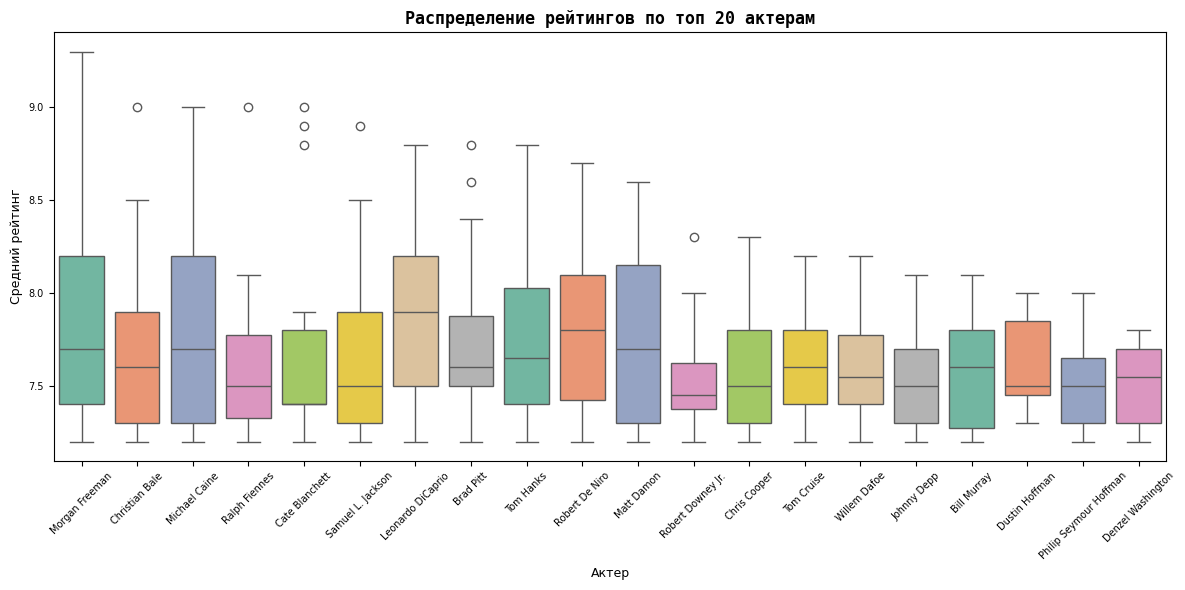

In [17]:
# boxplot для актеров (топ 20)

df_exploded_a = df.assign(cast=df['cast'].str.split(', ')).explode('cast')
df_exploded_a['cast'] = df_exploded_a['cast'].str.strip()

top_actors = df_exploded_a['cast'].value_counts().head(20).index.tolist()
df_filtered_a = df_exploded_a[df_exploded_a['cast'].isin(top_actors)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered_a, x="cast", y="average_rating", hue="cast", palette="Set2")

plt.xticks(rotation=45)
plt.title("Распределение рейтингов по топ 20 актерам", fontsize=12, fontweight="bold", family='monospace')
plt.xlabel("Актер", fontsize=9)
plt.ylabel("Средний рейтинг", fontsize=9)
plt.tick_params(labelsize=7)
plt.tight_layout()
plt.show()

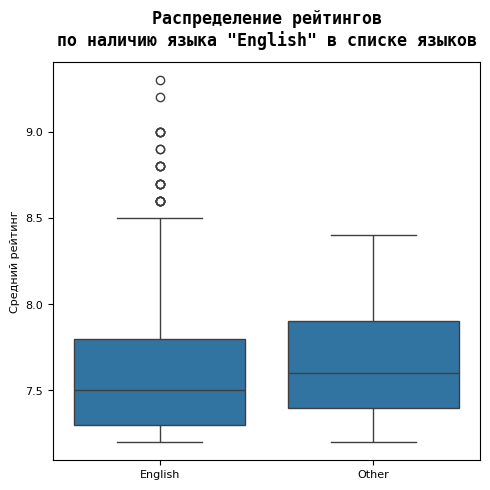

In [9]:
# boxplot для распределение рейтингов по наличию языка "English" 

df['group'] = df['languages'].apply(lambda x: 'English' if 'English' in x else 'Other')
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='group', y='average_rating')

plt.title('Распределение рейтингов\nпо наличию языка "English" в списке языков', fontsize=12, fontweight="bold", family='monospace', y=1.02)
plt.xlabel(None)
plt.ylabel('Средний рейтинг', fontsize=8)
plt.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

Выводы:

metascore vs. average_rating<br>
Наблюдается положительная корреляция: фильмы с более высоким metascore имеют тенденцию получать более высокий average_rating.
Это логично, так как критики и зрители часто оценивают фильмы схожим образом.

runtime vs. average_rating<br>
Нет выраженной зависимости, но можно заметить, что фильмы с очень коротким хронометражем (меньше 80 минут) имеют тенденцию к более низким рейтингам.
Самые высокие рейтинги встречаются в диапазоне 90-150 минут.

release_year vs. average_rating<br>
Наблюдается небольшая тенденция к снижению рейтингов у более современных фильмов (с 2000-х годов).
Возможно, это связано с ростом количества фильмов и большей критичностью аудитории.

budget vs. average_ating<br>
Отсутствует явная зависимость: фильмы с любым бюджетом могут получать как высокие, так и низкие рейтинги.
Это подтверждает, что большие затраты не гарантируют высокую оценку.

worldwide_gross vs. average_rating<br>
Аналогично бюджету, нет явной зависимости.
Это говорит о том, что кассовый успех не всегда связан с высокой оценкой зрителей.

profit_or_loss vs. average_rating<br>
Наблюдается слабая тенденция к более высоким рейтингам у фильмов с прибылью, но сильной зависимости нет.

p&l_rate vs. average_rating<br>
Нет чёткой зависимости

<br>
При этом влияние на рейтинг оказывают категориальные признаки: жанр, режиссёр, актерский состав.